In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
sonar_data = pd.read_csv('/content/Copy of sonar data.csv', header=None)
sonar_data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [4]:
sonar_data.shape

(208, 61)

In [6]:
# Statistical Measurement of data
sonar_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [8]:
# Check the number of mines and rocks present in data
sonar_data[60].value_counts()

,count
60,
M,111
R,97


In [9]:
sonar_data.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


In [10]:
# Separating Data and Labels
X = sonar_data.drop(columns=60, axis=1)
print(X)
Y = sonar_data[60]
print(Y)

         0       1       2       3       4       5       6       7       8   \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         9   ...      50      51      52      53   

In [11]:
# Splitting Training and Testing Data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify=Y, random_state=1)

In [13]:
print(X.shape, X_train.shape, X_test.shape)
print(Y.shape, Y_train.shape, Y_test.shape)

(208, 60) (187, 60) (21, 60)
(208,) (187,) (21,)


In [14]:
# Start Training Model(Logistic Regression)
model = LogisticRegression()

In [15]:
model.fit(X_train, Y_train)

LogisticRegression()

In [16]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [17]:
print('Accuracy score: ', training_data_accuracy)

Accuracy score:  0.8342245989304813


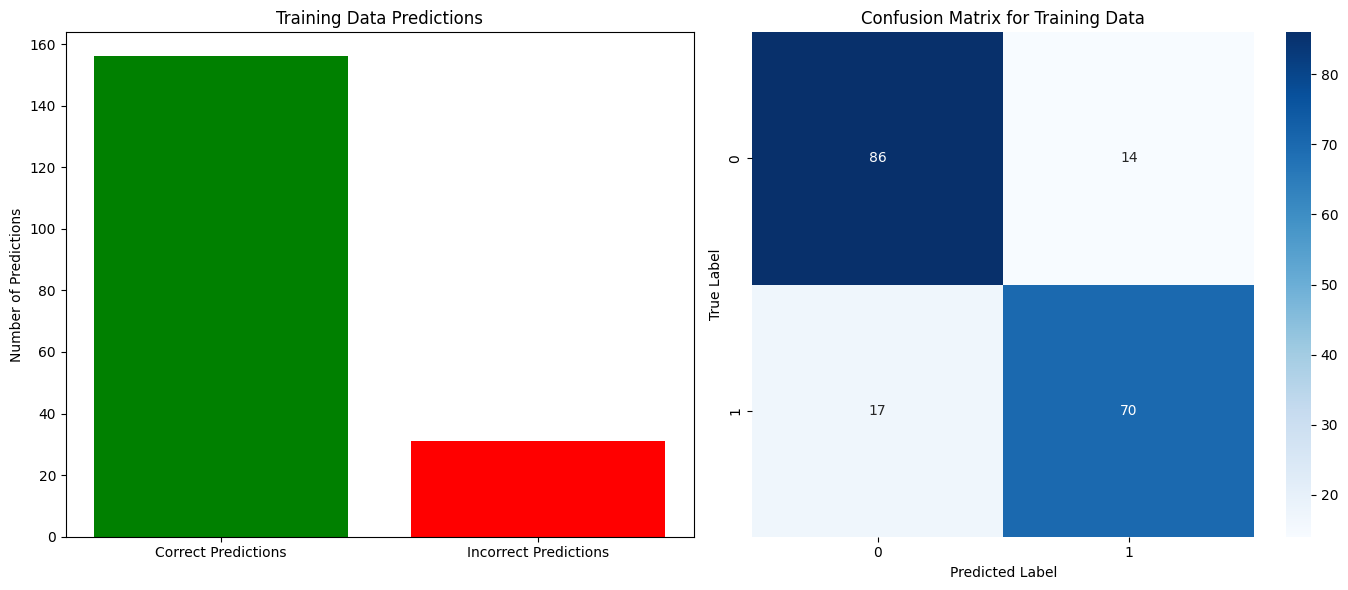

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming X_train_prediction and Y_train are defined
correct_predictions = X_train_prediction == Y_train
incorrect_predictions = ~correct_predictions

# Count correct and incorrect predictions
correct_count = np.sum(correct_predictions)
incorrect_count = np.sum(incorrect_predictions)

# Data for plotting
categories = ['Correct Predictions', 'Incorrect Predictions']
counts = [correct_count, incorrect_count]

# Compute confusion matrix for training data
conf_matrix = confusion_matrix(Y_train, X_train_prediction)

# Creating subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plotting the bar chart
axes[0].bar(categories, counts, color=['green', 'red'])
axes[0].set_title('Training Data Predictions')
axes[0].set_ylabel('Number of Predictions')

# Plotting the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Confusion Matrix for Training Data')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

# Display the plots
plt.tight_layout()
plt.show()


In [18]:
  X_test_prediction = model.predict(X_test)
  test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [19]:
print('Accuracy score: ', test_data_accuracy)

Accuracy score:  0.7619047619047619


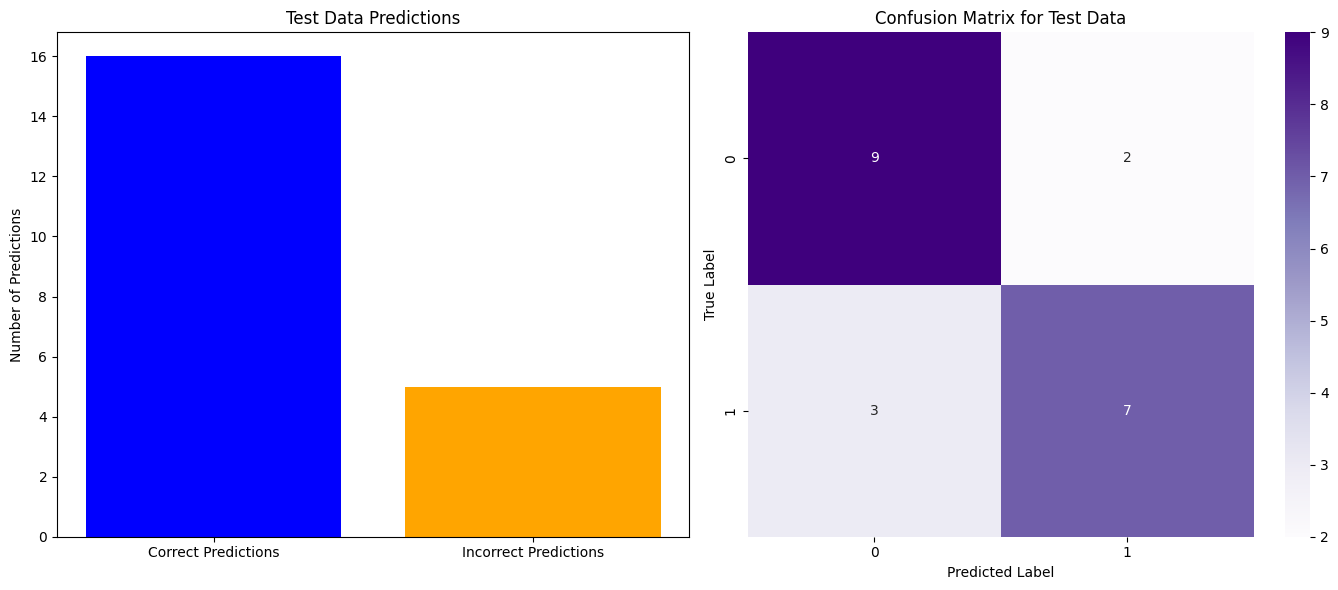

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming X_test_prediction and Y_test are defined
correct_predictions = X_test_prediction == Y_test
incorrect_predictions = ~correct_predictions

# Count correct and incorrect predictions
correct_count = np.sum(correct_predictions)
incorrect_count = np.sum(incorrect_predictions)

# Data for plotting
categories = ['Correct Predictions', 'Incorrect Predictions']
counts = [correct_count, incorrect_count]

# Compute confusion matrix for test data
conf_matrix = confusion_matrix(Y_test, X_test_prediction)

# Creating subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plotting the bar chart
axes[0].bar(categories, counts, color=['blue', 'orange'])
axes[0].set_title('Test Data Predictions')
axes[0].set_ylabel('Number of Predictions')

# Plotting the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples', ax=axes[1])
axes[1].set_title('Confusion Matrix for Test Data')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

# Display the plots
plt.tight_layout()
plt.show()
